## Cài đặt thư viện cần thiết và kết nối drive: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import cv2

## Tổ chức lại cấu trúc dữ liệu của tập data_org 

In [22]:
# data
#   - train
#       -- images
#       -- labels
#   - validation
#       -- images
#       -- labels
#   - test
#       -- images
#       -- labels

%cd /content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7
!mkdir data

!mkdir data/train
!mkdir data/val
!mkdir data/test

%cd /content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/train
!mkdir images labels
%cd /content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/val
!mkdir images labels
%cd /content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/test
!mkdir images labels

/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7
/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/train
/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/val
/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/test


In [23]:
 # prepare data to train valid test
import glob2
import random
import numpy as np
import os
import shutil
from PIL import Image

data_dir ="/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data_org"
output_dir = "/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data"
ratios=(0.7, 0.2, 0.1) 

#  get image path and label path
for fld in os.listdir("{}/images".format(data_dir)):
  all_files = []
  for img in os.listdir("{}/images/{}".format(data_dir,fld)):
    all_files.append(os.path.splitext(img)[0])
    random.shuffle(all_files)
  all_imgs = []
  all_lbs = []
  for files in all_files:
    img_path = os.path.join("{}/images/{}/{}".format(data_dir,fld,files)+".jpg")
    all_imgs.append(img_path)
    
    lb_path = os.path.join("{}/labels/{}/{}".format(data_dir,fld,files)+".txt")
    all_lbs.append(lb_path)
#  split train val test 
  num_files = len(all_files)
  num_train = int(ratios[0] * num_files)
  num_val = int(ratios[1] * num_files)
  num_test = int(ratios[2] * num_files)

#  copy file
  for i,img in enumerate(all_imgs):
    if i < num_train:
      dest_dir = os.path.join(output_dir, "train")
    elif i < num_train + num_val:
      dest_dir = os.path.join(output_dir, "val")
    else:
      dest_dir = os.path.join(output_dir, "test")
    shutil.copy(img,os.path.join(dest_dir, "images"))
    img_cp = os.path.join(dest_dir, "images",os.path.basename(img))
    img = Image.open(img_cp)
    img = img.resize((227, 227))
    img.save(img_cp)
    
    shutil.copy(all_lbs[i],os.path.join(dest_dir, "labels"))
  print(fld,"find {} images and {} labels".format(len(all_imgs),len(all_lbs)))


metal find 100 images and 100 labels
biological find 100 images and 100 labels
paper find 100 images and 100 labels
glass find 100 images and 100 labels
plastic find 100 images and 100 labels


In [47]:
import os
import random
import glob
import tensorflow as tf
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (227, 227))
    # img = tf.cast(img, tf.float32)
    img = img / 255.0
    return img


def load_label(label_path):
    with open(label_path, 'r') as f:
        label = int(f.read().strip())
    return label

def get_image_paths_and_labels(data_dir):
    image_paths = []
    labels = []
    for label_dir in os.listdir(data_dir):
        label_path = os.path.join(data_dir, 'labels')
        image_path = os.path.join(data_dir, 'images')
        file_list = glob.glob(os.path.join(image_path, '*.jpg'))
        random.shuffle(file_list)  
        for image_file in file_list:
            image_paths.append(image_file)
            label_file = os.path.join(label_path, os.path.splitext(os.path.basename(image_file))[0] + '.txt')
            label = load_label(label_file)
            labels.append(label)

    return image_paths, labels

train_dir = '/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/train'
valid_dir = '/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/val'
test_dir = '/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/data/test'

train_image_paths, train_labels = get_image_paths_and_labels(train_dir)
valid_image_paths, valid_labels = get_image_paths_and_labels(valid_dir)
test_image_paths, test_labels = get_image_paths_and_labels(test_dir)

train_images = [load_image(image_path) for image_path in train_image_paths]
valid_images = [load_image(image_path) for image_path in valid_image_paths]
test_images = [load_image(image_path) for image_path in test_image_paths]

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

for images, labels in train_ds.take(1):
    print(images.shape)  
    print(labels.shape)  

train_images, train_labels = next(iter(train_ds))
train_images = train_images.numpy()
train_labels = train_labels.numpy()


(227, 227, 3)
()


In [48]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
valid_ds_size=tf.data.experimental.cardinality(valid_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()

print('Train size:',train_ds_size)
print('valid size:',valid_ds_size)
print('test size:',test_ds_size)

Train size: 700
valid size: 200
test size: 150


In [49]:

train_ds=(train_ds
          # .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
valid_ds=(valid_ds
          # .shuffle(buffer_size=valid_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          # .shuffle(buffer_size=valid_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

## Biểu diễn vài mẫu dữ liệu từ tập train

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))

CLASS_NAMES= ['biological','glass', 'metal', 'paper', 'plastic']

# Lấy một batch từ train_ds
for images, labels in train_ds.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i])
        plt.title(CLASS_NAMES[labels[i].numpy()])
        plt.axis("off")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Xây dựng model Alexnet

In [20]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='softmax')  
    
    
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

## Huấn luyện model và đánh giá model

In [28]:
history=model.fit(
    train_ds,
    epochs=100,
    validation_data=valid_ds,
    validation_freq=1
)

Epoch 1/100
21/21 [==============================] - 1s 59ms/step - loss: 0.3972 - accuracy: 0.9137 - val_loss: 4.3530 - val_accuracy: 0.3542
Epoch 2/100
21/21 [==============================] - 1s 50ms/step - loss: 0.1731 - accuracy: 0.9315 - val_loss: 2.0989 - val_accuracy: 0.5104
Epoch 3/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0769 - accuracy: 0.9747 - val_loss: 0.8890 - val_accuracy: 0.7656
Epoch 4/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0487 - accuracy: 0.9866 - val_loss: 1.1735 - val_accuracy: 0.7135
Epoch 5/100
21/21 [==============================] - 1s 49ms/step - loss: 0.0325 - accuracy: 0.9926 - val_loss: 1.0656 - val_accuracy: 0.7760
Epoch 6/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0244 - accuracy: 0.9970 - val_loss: 0.6084 - val_accuracy: 0.8594
Epoch 7/100
21/21 [==============================] - 1s 50ms/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 1.3684 - val_accuracy: 0.7552
Epoch 

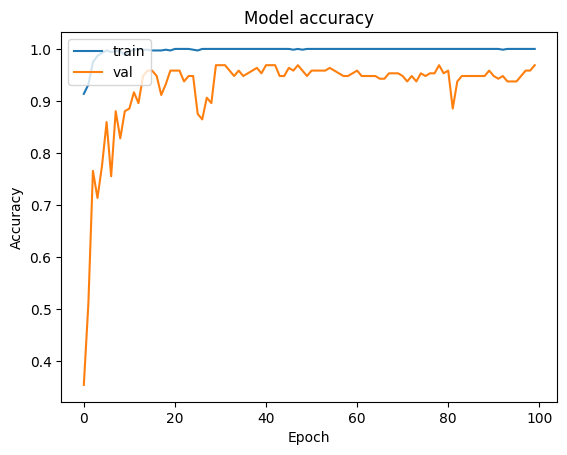

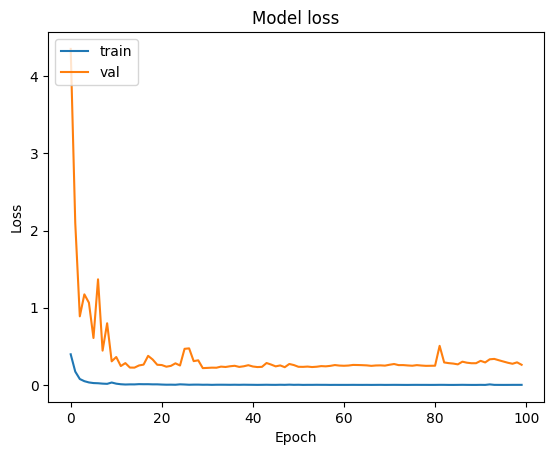

In [29]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [31]:
model.save_weights('/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/model_weights.h5')


4/4 [==============================] - 0s 23ms/step


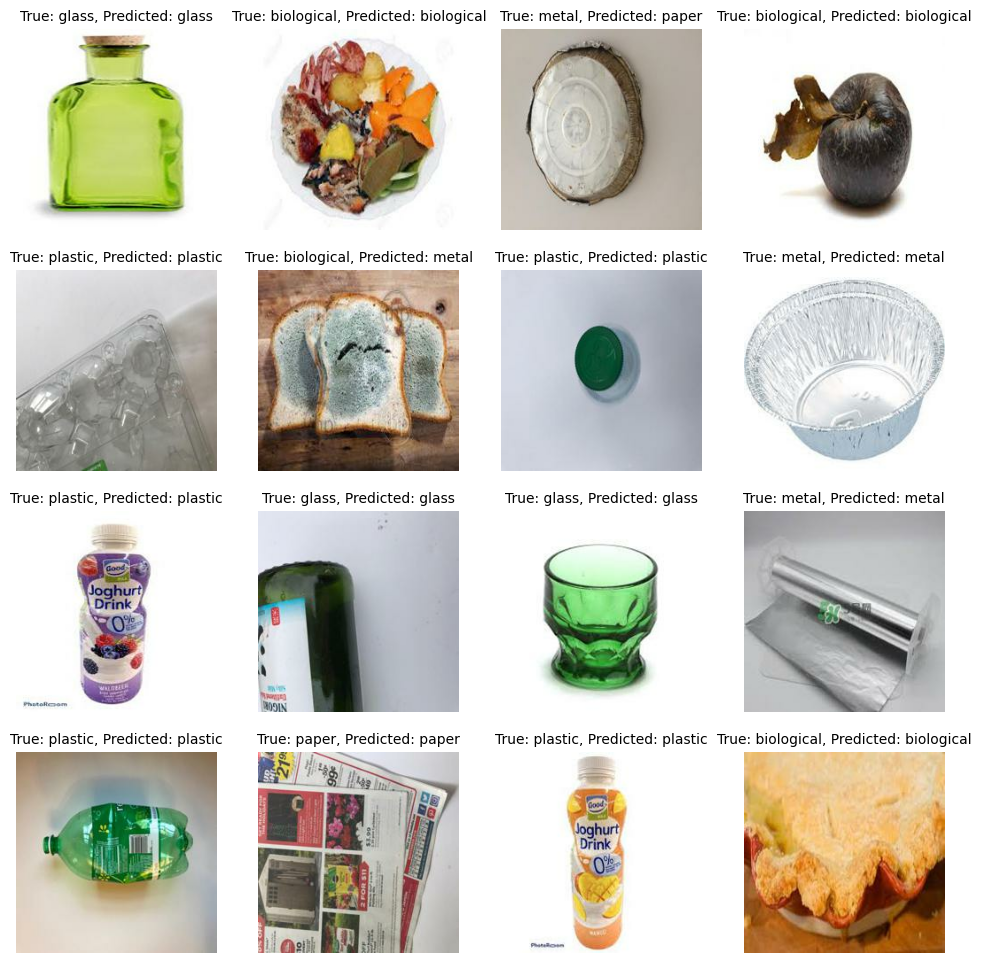

In [56]:
import matplotlib.pyplot as plt
import random
CLASS_NAMES= ['biological','glass', 'metal', 'paper', 'plastic']

# Load model weights
model.load_weights('/content/drive/MyDrive/BTL_TGM_HK222/Homework/HW7/model_weights.h5')

# Make predictions on test dataset
y_pred = model.predict(test_ds)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get a batch of test data
test_images, test_labels = next(iter(test_ds))
test_images = test_images.numpy()
test_labels = test_labels.numpy()

# Get 16 random images and their corresponding true labels and predicted labels
random_indices = random.sample(range(len(test_images)), 16)
images = test_images[random_indices]
true_labels = test_labels[random_indices]
predicted_labels = y_pred_classes[random_indices]

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f'True: {CLASS_NAMES[true_labels[i]]}, Predicted: {CLASS_NAMES[predicted_labels[i]]}',  fontsize=10)
    ax.axis('off')
plt.show()
